In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import pickle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Input,Dense, Dropout
tf.config.list_physical_devices()

2024-11-06 14:56:10.433783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 14:56:10.448084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 14:56:10.452141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 14:56:10.462885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 14:56:11.215247: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
def plot_history(history):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Train - Accuracy')

1.1

In [3]:
def preprocess_mnist_data(X_train, y_train, X_test, y_test):
    num_classes = np.unique(y_train).__len__()
    lenght = X_train.shape[1]
    width = X_train.shape[2]
    print(f"num_classes: {num_classes}, lenght: {lenght}, width: {width}")  
    X_train = X_train.reshape(X_train.shape[0], lenght*width).astype('float32') / 255
    X_test = X_test.reshape(X_test.shape[0], lenght*width).astype('float32') / 255
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return X_train, y_train, X_test, y_test, num_classes

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, y_train, X_test, y_test,num_classes = preprocess_mnist_data(X_train, y_train, X_test, y_test)
batch_size = 128
epochs = 10
input_shape = X_train[0].shape

num_classes: 10, lenght: 28, width: 28


In [5]:
mlp_mnist_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
mlp_mnist_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = mlp_mnist_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = mlp_mnist_model.evaluate(X_test, y_test, verbose=1)
# mlp_mnist_model.summary()

I0000 00:00:1730901372.794562  141146 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730901372.794695  141146 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730901372.794721  141146 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730901372.907400  141146 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730901372.907515  141146 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06

Epoch 1/10


I0000 00:00:1730901374.986267  141244 service.cc:146] XLA service 0x7f829400c8c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730901374.986349  141244 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-11-06 14:56:15.018958: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-06 14:56:15.162041: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


117/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.8061

I0000 00:00:1730901376.994056  141244 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.4409

2024-11-06 14:56:21.140183: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 336 bytes spill stores, 288 bytes spill loads

2024-11-06 14:56:21.451854: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 184 bytes spill stores, 184 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8665 - loss: 0.4405 - val_accuracy: 0.9691 - val_loss: 0.1028
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1030 - val_accuracy: 0.9743 - val_loss: 0.0793
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0708 - val_accuracy: 0.9774 - val_loss: 0.0710
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0539 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0435 - val_accuracy: 0.9797 - val_loss: 0.0719
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9813 - val_loss: 0.0695
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0329 - val_accuracy: 0.9802 - val_loss: 0.0683
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9826 - va

1.2

In [6]:
def load_fashion_mnist_data(validation_percentage=0.1):
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    X_train, y_train, X_test, y_test,num_classes = preprocess_mnist_data(X_train, y_train, X_test, y_test)
    # split X_train and y_train into training and validation sets
    X_val = X_train[int(X_train.shape[0]*(1-validation_percentage)):]
    y_val = y_train[int(y_train.shape[0]*(1-validation_percentage)):]
    X_train = X_train[:int(X_train.shape[0]*(1-validation_percentage))]
    y_train = y_train[:int(y_train.shape[0]*(1-validation_percentage))]
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_fashion_mnist_data()

num_classes: 10, lenght: 28, width: 28


In [7]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# adapted from https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide#Labels

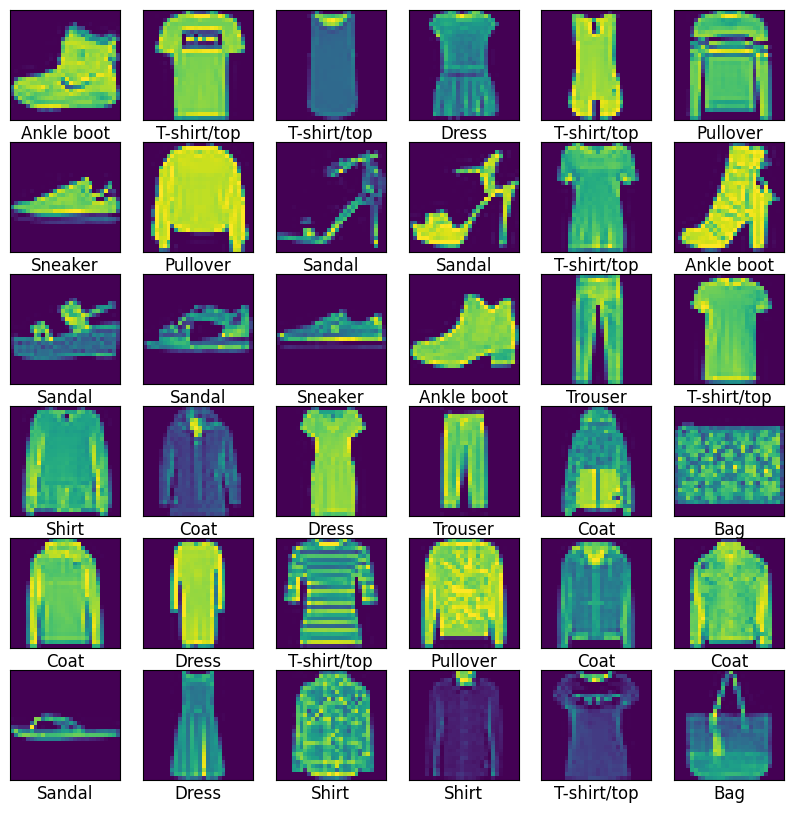

In [8]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([]) # making the x and y axis invisible
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = np.argmax(y_train[i])
    plt.title(labels[label_index],y=-0.25)
plt.show()

In [9]:
fashion_mnist_mlp_model = Sequential([
    Input(shape=input_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])
# fashion_mnist_mlp_model.summary()
fashion_mnist_mlp_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
epochs = 10
batch_size = 128
history = fashion_mnist_mlp_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
test_loss, test_acc = fashion_mnist_mlp_model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7380 - loss: 0.7730 - val_accuracy: 0.8278 - val_loss: 0.4741
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.4037 - val_accuracy: 0.8534 - val_loss: 0.4103
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3558 - val_accuracy: 0.8622 - val_loss: 0.3862
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3322 - val_accuracy: 0.8651 - val_loss: 0.3752
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8879 - loss: 0.3114 - val_accuracy: 0.8718 - val_loss: 0.3547
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8965 - loss: 0.2873 - val_accuracy: 0.8768 - val_loss: 0.3505
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2817 - val_accuracy: 0.8806 - val_loss: 0.3320
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9045 - loss: 0.2625 - val_accuracy: 0

CNN of the fashion dataset

In [10]:
image_shape = (28, 28, 1)
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_fashion_mnist_data()
X_train = X_train.reshape(X_train.shape[0],*image_shape) # revert to the original shape
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)
X_train.shape

num_classes: 10, lenght: 28, width: 28


(54000, 28, 28, 1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7179 - loss: 0.8059 - val_accuracy: 0.8525 - val_loss: 0.4096
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.3857 - val_accuracy: 0.8778 - val_loss: 0.3427
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.3328 - val_accuracy: 0.8792 - val_loss: 0.3348
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.3057 - val_accuracy: 0.9003 - val_loss: 0.2889
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2876 - val_accuracy: 0.8957 - val_loss: 0.2887
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.2640 - val_accuracy: 0.9027 - val_loss: 0.2713
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9047 - loss: 0.2625 - val_accuracy: 0.9043 - val_loss: 0.2705
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - loss: 0.2447 - val_accuracy: 0.

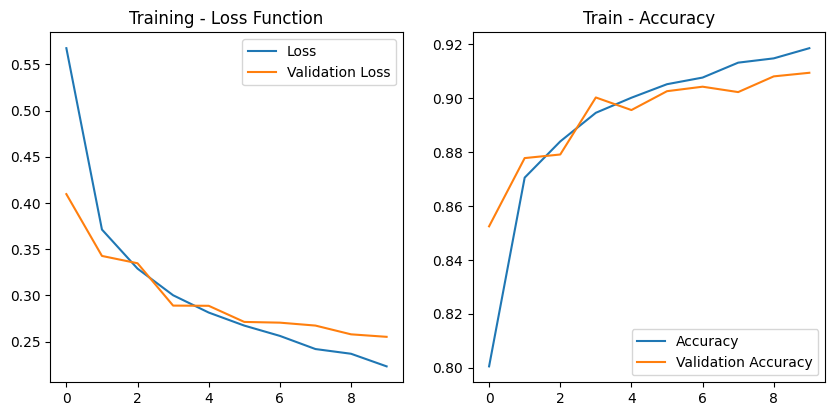

In [11]:
cnn_model_fashion_mnist = Sequential([
    Input(shape=image_shape),
    Conv2D(filters=32,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(num_classes,activation = 'softmax')
])
cnn_model_fashion_mnist.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
# TODO check difference (loss='categorical_crossentropy', and sparse_categorical_crossentropy)
# from https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide#Define-the-model
history = cnn_model_fashion_mnist.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val),
)
test_loss, test_acc = cnn_model_fashion_mnist.evaluate(X_test, y_test, verbose=2)	
print(f"Test accuracy: {test_acc}")
cnn_model_fashion_mnist.save('cnn_model_fahsion_mnist.keras')
plot_history(history)

CIFAR-10 dataset

In [12]:
def load_cifar10_data():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    num_classes = np.unique(y_train).__len__()
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return X_train, y_train, X_test, y_test, num_classes
X_train, y_train, X_test, y_test, num_classes = load_cifar10_data()

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3169 - loss: 8.4372 - val_accuracy: 0.4871 - val_loss: 1.4780
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5608 - loss: 1.2400 - val_accuracy: 0.5964 - val_loss: 1.1500
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6423 - loss: 1.0164 - val_accuracy: 0.6344 - val_loss: 1.0695
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6817 - loss: 0.8948 - val_accuracy: 0.6508 - val_loss: 1.0290
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7259 - loss: 0.7883 - val_accuracy: 0.6808 - val_loss: 0.9375
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7540 - loss: 0.7090 - val_accuracy: 0.6746 - val_loss: 0.9752
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7740 - loss: 0.6493 - val_accuracy: 0.6816 - val_loss: 0.9600
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.5944 - val_accuracy: 0

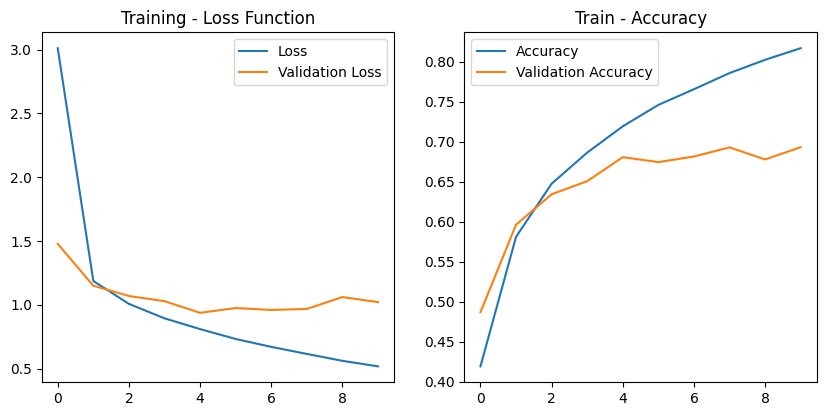

In [13]:
cnn_model_cifar10 = Sequential([
    Input(shape=X_train[0].shape), # image shape is (32, 32, 3)
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
cnn_model_cifar10.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = cnn_model_cifar10.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test),
)
# cnn_model_cifar10.summary()
plot_history(history)

running tests

In [14]:
def create_model_small(shape,activation='relu', optimizer='adam', 
                 regularization=None, dropout_rate=0.0, architectures=[32,32]):
    model = Sequential([
        Input(shape=shape),
        Conv2D(filters=architectures[0],kernel_size=3,activation=activation,kernel_regularizer=regularization),
        MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
        Dropout(dropout_rate),
        Flatten(),
        Dense(architectures[1],activation=activation),
        Dense(num_classes,activation = 'softmax')
    ])
    model.compile(loss ='categorical_crossentropy', optimizer=optimizer,metrics =['accuracy'])
    return model

In [15]:
initializations = ['he_normal', 'glorot_uniform']
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']
regularizations = [None, l2(0.01), l1(0.01)]
dropout_rates = [0.0, 0.25]
architectures = [[32,32], [64,64], [128,128]]

In [16]:
image_shape = (28, 28, 1)
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_fashion_mnist_data()
X_train = X_train.reshape(X_train.shape[0],*image_shape) # revert to the original shape
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)
X_train.shape

num_classes: 10, lenght: 28, width: 28


(54000, 28, 28, 1)

In [17]:
epochs = 10

In [19]:
combinations_small = {}
for architecture in architectures:
    for activation in activations:
        for opt in optimizers:
            for reg in regularizations:
                for dropout_rate in dropout_rates:
                    print(f"Training model with activation={activation}, optimizer={opt}, "
                            f"reg={reg}, dropout_rate={dropout_rate}, architecture={architecture}")
                    model = create_model_small(shape=X_train[0].shape, activation=activation, optimizer=opt, 
                                            regularization=reg, dropout_rate=dropout_rate,architectures=architecture)
                    history = model.fit(
                            X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_val, y_val),
                        )
                    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)	
                    print("\nTest accuracy:", test_acc)
                    combinations_small[(*architecture, activation, opt, reg, dropout_rate)] = {'test_acc': test_acc, 'history': history}
with open(f'combinations_small_{epochs}_epochs.pkl', 'wb') as f:
    pickle.dump(combinations_small, f)

Training model with activation=relu, optimizer=adam, reg=None, dropout_rate=0.0, architecture=[32, 32]
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7261 - loss: 0.8141 - val_accuracy: 0.8645 - val_loss: 0.3863
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.3685 - val_accuracy: 0.8833 - val_loss: 0.3368
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.3203 - val_accuracy: 0.8978 - val_loss: 0.2986
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9001 - loss: 0.2799 - val_accuracy: 0.8957 - val_loss: 0.2933
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.2644 - val_accuracy: 0.9018 - val_loss: 0.2750
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9133 - loss: 0.2398 - val_accuracy: 0.8953 - val_loss: 0.2800
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2229 - val_accuracy: 0.9018 - val_loss: 0.2732
E

2024-11-06 15:12:13.091770: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_204', 4 bytes spill stores, 4 bytes spill loads



422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7815 - loss: 0.6288 - val_accuracy: 0.8857 - val_loss: 0.3183
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8948 - loss: 0.2933 - val_accuracy: 0.8970 - val_loss: 0.2759
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.2392 - val_accuracy: 0.9073 - val_loss: 0.2566
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9286 - loss: 0.1983 - val_accuracy: 0.9100 - val_loss: 0.2527
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9424 - loss: 0.1632 - val_accuracy: 0.9082 - val_loss: 0.2563
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9508 - loss: 0.1404 - val_accuracy: 0.9155 - val_loss: 0.2406
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1112 - val_accuracy: 0.9163 - val_loss: 0.2350
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.0970 - val_accuracy: 0.9142 - val

In [20]:
# get the top K highest accuracy
combinations_small = {k: v for k, v in sorted(combinations_small.items(), key=lambda item: item[1]['test_acc'], reverse=True)}
top_k = 3
top_k_combinations_small = dict(list(combinations_small.items())[:top_k])
top_k_combinations_small

{(128,
  128,
  'relu',
  'adam',
  0.25): {'test_acc': 0.9150000214576721,
  'history': <keras.src.callbacks.history.History at 0x7f8337347390>},
 (128, 128, 'tanh', 'adam', None, 0.0): {'test_acc': 0.914900004863739,
  'history': <keras.src.callbacks.history.History at 0x7f83382d0d90>},
 (128, 128, 'relu', 'adam', None, 0.0): {'test_acc': 0.9147999882698059,
  'history': <keras.src.callbacks.history.History at 0x7f83361d0d90>}}

In [23]:
top_k_combinations_small.keys()

dict_keys([(128, 128, 'relu', 'adam', <keras.src.regularizers.regularizers.L2 object at 0x7f839881b1d0>, 0.25), (128, 128, 'tanh', 'adam', None, 0.0), (128, 128, 'relu', 'adam', None, 0.0)])

In [25]:
X_train, y_train, X_test, y_test, num_classes = load_cifar10_data()
shape = X_train[1:].shape
# train models with the top k combinations
cifar10_top_k_results_small = {}
for (layer1_arch, layer2_arch, activation, opt, reg, dropout_rate) in top_k_combinations_small.keys():
    print(f"Training model with activation={activation}, optimizer={opt}, "
            f"reg={reg}, dropout_rate={dropout_rate}")
    architectures = [layer1_arch, layer2_arch]
    model = create_model_small(shape=X_train[0].shape,activation=activation, optimizer=opt, 
                            regularization=reg, dropout_rate=dropout_rate, architectures=architectures)
    history = model.fit(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            # validation_data=(X_test, y_test),
        )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)	
    print("\nTest accuracy:", test_acc)
    cifar10_top_k_results_small[(*architectures,activation, opt, reg, dropout_rate)] = {'test_acc': test_acc, 'history': history}
cifar10_top_k_results_small

Training model with activation=relu, optimizer=adam, reg=<keras.src.regularizers.regularizers.L2 object at 0x7f839881b1d0>, dropout_rate=0.25
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2834 - loss: 36.2150
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5157 - loss: 1.4233
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5876 - loss: 1.2180
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6462 - loss: 1.0502
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6900 - loss: 0.9347
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7139 - loss: 0.8678
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7386 - loss: 0.8093
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7705 - loss: 0.6985
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7996 - loss: 0.6270
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8186 - loss: 0.5

2024-11-06 15:19:37.120452: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_205', 4 bytes spill stores, 4 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0977 - loss: 2.8167
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0974 - loss: 2.3101
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0981 - loss: 2.3117
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0974 - loss: 2.3091
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1013 - loss: 2.3099
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1051 - loss: 2.3086
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0956 - loss: 2.3103
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0993 - loss: 2.3106
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1022 - loss: 2.3095
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1002 - loss: 2.3106
313/313 - 1s - 4ms/step - accuracy: 0.1000 - loss: 2.3056

Test accuracy: 0.10000000149011612
Training model with activation=relu, optimizer=adam, reg

{(128,
  128,
  'relu',
  'adam',
  0.25): {'test_acc': 0.5637999773025513,
  'history': <keras.src.callbacks.history.History at 0x7f8330b21d90>},
 (128, 128, 'tanh', 'adam', None, 0.0): {'test_acc': 0.10000000149011612,
  'history': <keras.src.callbacks.history.History at 0x7f832c1970d0>},
 (128, 128, 'relu', 'adam', None, 0.0): {'test_acc': 0.5516999959945679,
  'history': <keras.src.callbacks.history.History at 0x7f831413a210>}}

In [26]:
with open(f'cifar10_top_k_small_results_{epochs}_epochs.pkl', 'wb') as f:
    pickle.dump(cifar10_top_k_results_small, f)
# load 
# with open(f'cifar10_top_k_small_results_{epochs}_epochs.pkl', 'rb') as f:
#     cifar10_top_k_results_small = pickle.load(f)

In [27]:
def create_model_big(shape,activation='relu', optimizer='adam', 
                 regularization=None, dropout_rate=0.0, architectures=[128,64,32]):
    model = Sequential([
        Input(shape=shape), # image shape is (32, 32, 3)
        Conv2D(architectures[0], (3, 3), activation=activation, padding='same', kernel_regularizer=regularization),
        MaxPooling2D((2, 2)),
        Conv2D(architectures[1], (3, 3), activation=activation, padding='same', kernel_regularizer=regularization),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Conv2D(architectures[1], (3, 3), activation=activation, padding='same', kernel_regularizer=regularization),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(architectures[2], activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss ='categorical_crossentropy', optimizer=optimizer,metrics =['accuracy'])
    return model

In [29]:
image_shape = (28, 28, 1)
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_fashion_mnist_data()
X_train = X_train.reshape(X_train.shape[0],*image_shape) # revert to the original shape
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)
X_train.shape

num_classes: 10, lenght: 28, width: 28


(54000, 28, 28, 1)

In [30]:
combinations_big = {}
architectures = [[128,64,32], [256,128,64], [512,256,128]]
for architecture in architectures:
    for activation in activations:
        for opt in optimizers:
            for reg in regularizations:
                for dropout_rate in dropout_rates:
                    print(f"Training model with activation={activation}, optimizer={opt}, "
                            f"reg={reg}, dropout_rate={dropout_rate}")
                    model = create_model_big(shape=X_train[0].shape, activation=activation, optimizer=opt, 
                                            regularization=reg, dropout_rate=dropout_rate)
                    history = model.fit(
                            X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_val, y_val),
                        )
                    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)	
                    print("\nTest accuracy:", test_acc)
                    combinations_big[(*architecture, activation, opt, reg, dropout_rate)] = {'test_acc': test_acc, 'history': history}
with open(f'combinations_big_{epochs}_epochs.pkl', 'wb') as f:
    pickle.dump(combinations_big, f)

Training model with activation=relu, optimizer=adam, reg=None, dropout_rate=0.0
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6744 - loss: 0.9021 - val_accuracy: 0.8552 - val_loss: 0.3930
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8703 - loss: 0.3604 - val_accuracy: 0.8843 - val_loss: 0.3279
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8873 - loss: 0.3028 - val_accuracy: 0.8915 - val_loss: 0.3034
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9021 - loss: 0.2702 - val_accuracy: 0.9023 - val_loss: 0.2709
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9107 - loss: 0.2486 - val_accuracy: 0.9020 - val_loss: 0.2731
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9194 - loss: 0.2246 - val_accuracy: 0.9040 - val_loss: 0.2621
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9249 - loss: 0.2084 - val_accuracy: 0.9120 - val_loss: 0.2442
Epoch 8/10
422/422 ━━━━

In [31]:
# get the top K highest accuracy
combinations_big = {k: v for k, v in sorted(combinations_big.items(), key=lambda item: item[1]['test_acc'], reverse=True)}
top_k = 5
top_k_combinations_big = dict(list(combinations_big.items())[:top_k])
top_k_combinations_big

{(256, 128, 64, 'relu', 'adam', None, 0.25): {'test_acc': 0.9139999747276306,
  'history': <keras.src.callbacks.history.History at 0x7f81a86dfdd0>},
 (128, 64, 32, 'relu', 'adam', None, 0.0): {'test_acc': 0.913100004196167,
  'history': <keras.src.callbacks.history.History at 0x7f82cc7d8750>},
 (256, 128, 64, 'relu', 'adam', None, 0.0): {'test_acc': 0.913100004196167,
  'history': <keras.src.callbacks.history.History at 0x7f81b006e3d0>},
 (256, 128, 64, 'tanh', 'adam', None, 0.0): {'test_acc': 0.9128999710083008,
  'history': <keras.src.callbacks.history.History at 0x7f810054dfd0>},
 (128, 64, 32, 'relu', 'adam', None, 0.25): {'test_acc': 0.9110999703407288,
  'history': <keras.src.callbacks.history.History at 0x7f82cc33b510>}}

In [33]:
X_train, y_train, X_test, y_test, num_classes = load_cifar10_data()
shape = X_train[1:].shape
# train models with the top k combinations
cifar10_top_k_results_big = {}
for (layer1,layer2,layers3,activation, opt, reg, dropout_rate) in top_k_combinations_big.keys():
    print(f"Training model with activation={activation}, optimizer={opt}, "
            f"reg={reg}, dropout_rate={dropout_rate}")
    architectures = [layer1,layer2,layers3]
    model = create_model_small(shape=X_train[0].shape,activation=activation, optimizer=opt, 
                            regularization=reg, dropout_rate=dropout_rate, architectures=architectures)
    history = model.fit(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=10,
            verbose=1,
            # validation_data=(X_test, y_test),
        )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)	
    print("\nTest accuracy:", test_acc)
    cifar10_top_k_results_big[(*architectures,activation, opt, reg, dropout_rate)] = {'test_acc': test_acc, 'history': history}
with open(f'cifar10_top_k_big_results_{epochs}_epochs.pkl', 'wb') as f:
    pickle.dump(cifar10_top_k_results_big, f)
cifar10_top_k_results_big

Training model with activation=relu, optimizer=adam, reg=None, dropout_rate=0.25
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3003 - loss: 47.9614
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5168 - loss: 1.3678
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5822 - loss: 1.1863
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6201 - loss: 1.0756
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6534 - loss: 0.9866
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6935 - loss: 0.8677
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7204 - loss: 0.7945
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7365 - loss: 0.7498
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7680 - loss: 0.6668
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7779 - loss: 0.6362
313/313 - 1s - 4ms/step - accuracy: 0.5658 - loss: 1.520

{(256, 128, 64, 'relu', 'adam', None, 0.25): {'test_acc': 0.5658000111579895,
  'history': <keras.src.callbacks.history.History at 0x7f801c5b1490>},
 (128, 64, 32, 'relu', 'adam', None, 0.0): {'test_acc': 0.5464000105857849,
  'history': <keras.src.callbacks.history.History at 0x7f80242e18d0>},
 (256, 128, 64, 'relu', 'adam', None, 0.0): {'test_acc': 0.5519000291824341,
  'history': <keras.src.callbacks.history.History at 0x7f800c77b290>},
 (256, 128, 64, 'tanh', 'adam', None, 0.0): {'test_acc': 0.10000000149011612,
  'history': <keras.src.callbacks.history.History at 0x7f800c5e8a10>},
 (128, 64, 32, 'relu', 'adam', None, 0.25): {'test_acc': 0.3463999927043915,
  'history': <keras.src.callbacks.history.History at 0x7f800c239c50>}}